In [43]:
import sys
print(sys.executable)


C:\Users\User\anaconda3\python.exe


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
pd.set_option("display.max_columns", None)


In [25]:
DATA_SOURCE = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(DATA_SOURCE)
print("Shape:", df.shape)
df.head()


Shape: (344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
print("Info:")
print(df.info())

print("\nNumeric summary:")
display(df.describe().T)

print("\nCategorical summary:")
cat_cols = df.select_dtypes(include=['object', 'category']).columns
if len(cat_cols) > 0:
    display(df[cat_cols].describe().T)
else:
    print("No categorical columns detected.")


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None

Numeric summary:


,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0



Categorical summary:


,count,unique,top,freq
species,344,3,Adelie,152
island,344,3,Biscoe,168
sex,333,2,MALE,168


In [6]:
# Missing values per column
missing = df.isna().sum().sort_values(ascending=False)
display(missing[missing > 0] if missing.sum() > 0 else "No missing values.")

# Duplicates
dup_count = df.duplicated().sum()
print(f"Duplicate rows: {dup_count}")

# Data types
df.dtypes.sort_values()


sex                  11
bill_depth_mm         2
bill_length_mm        2
flipper_length_mm     2
body_mass_g           2
dtype: int64

Duplicate rows: 0


bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
species               object
island                object
sex                   object
dtype: object

In [7]:
# Convert object columns that look categorical to 'category'
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

df.dtypes.sort_values()


TypeError: '<' not supported between instances of 'CategoricalDtype' and 'CategoricalDtype'

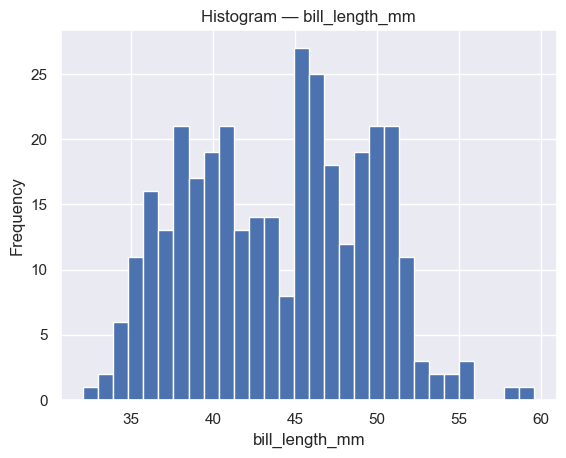

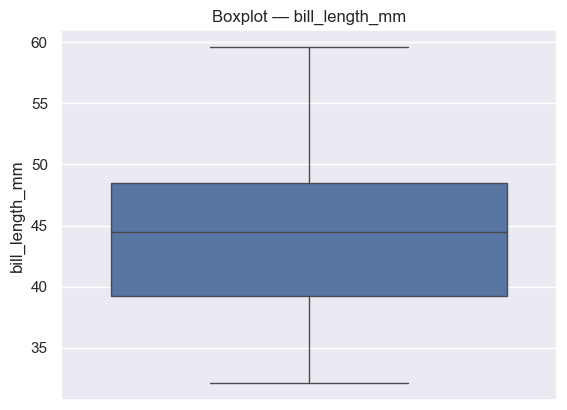

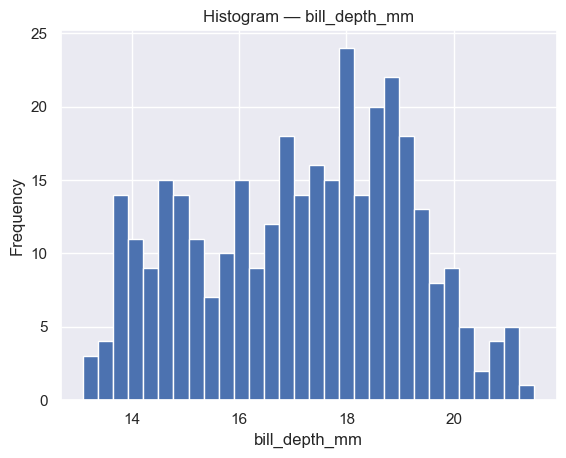

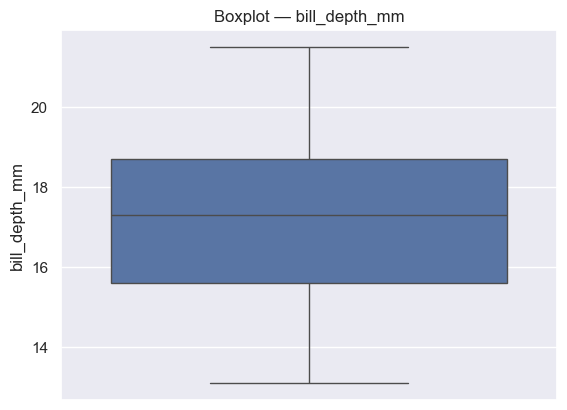

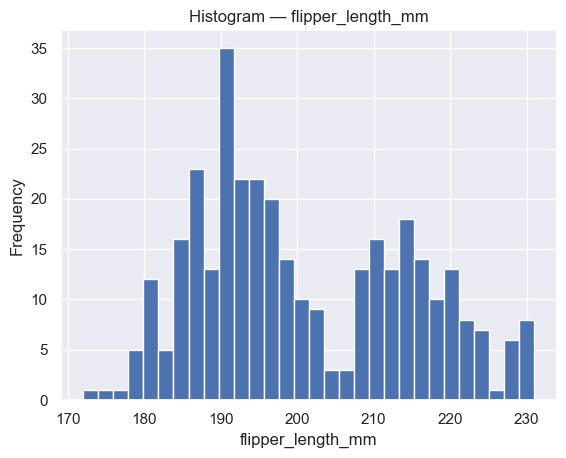

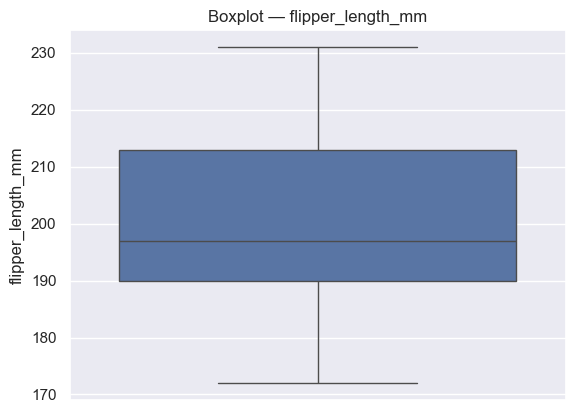

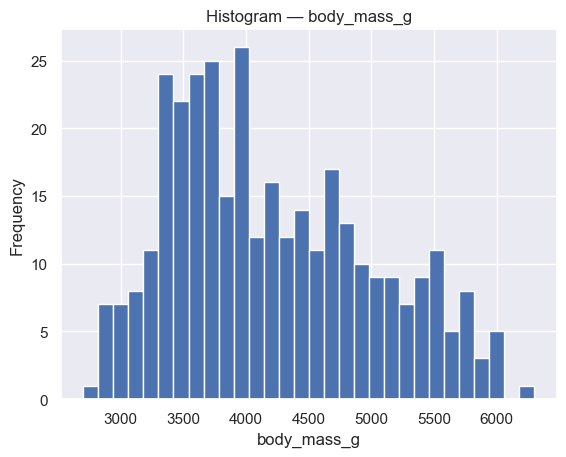

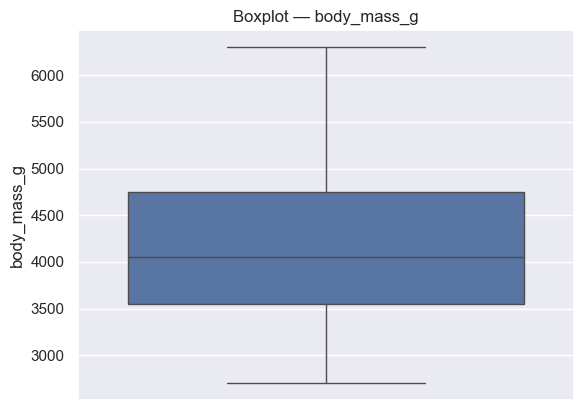

In [10]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in num_cols:
    plt.figure()
    # matplotlib histogram
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Histogram — {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

    # seaborn optional
    plt.figure()
    sns.boxplot(y=df[col], orient="v")
    plt.title(f"Boxplot — {col}")
    plt.ylabel(col)
    plt.show()


In [11]:
outlier_summary = []

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_summary.append((col, int(outliers)))

outlier_df = pd.DataFrame(outlier_summary, columns=["feature", "num_outliers"]).sort_values("num_outliers", ascending=False)
outlier_df


,feature,num_outliers
0,bill_length_mm,0
1,bill_depth_mm,0
2,flipper_length_mm,0
3,body_mass_g,0


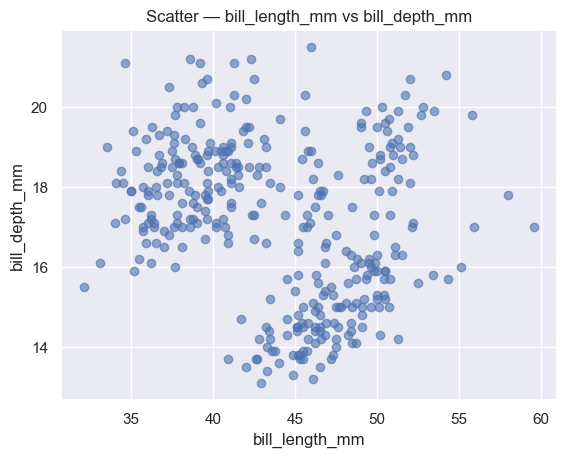

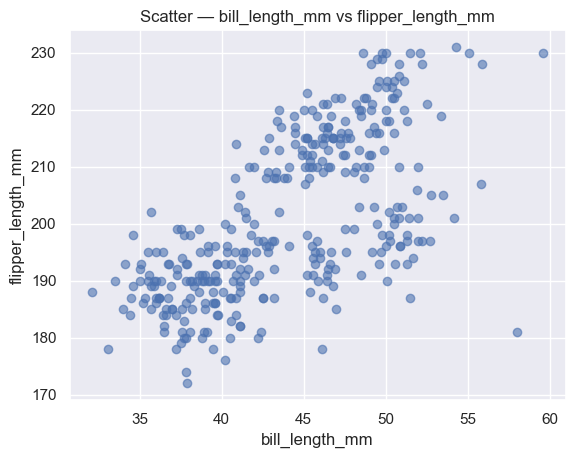

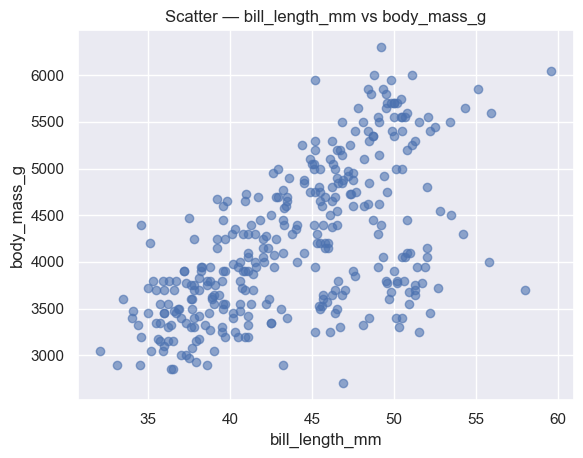

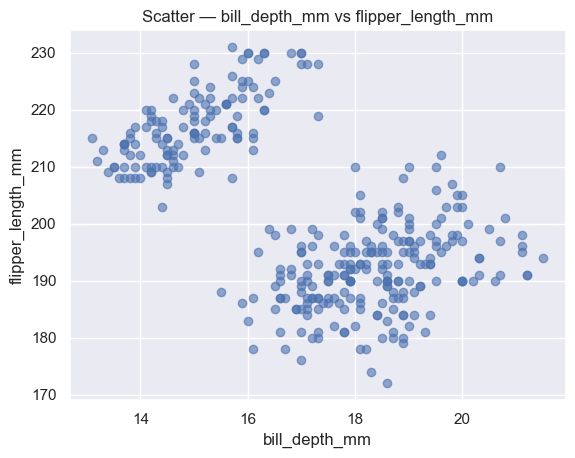

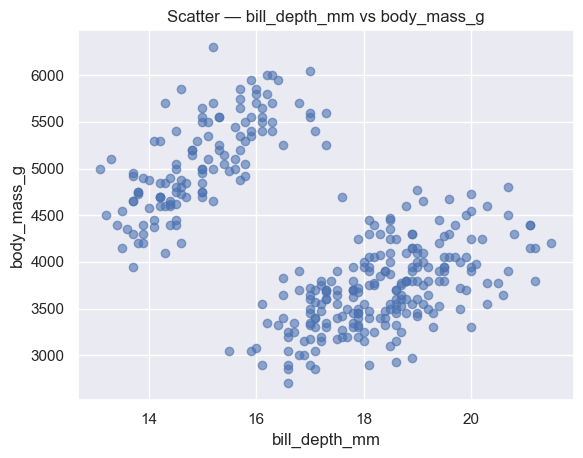

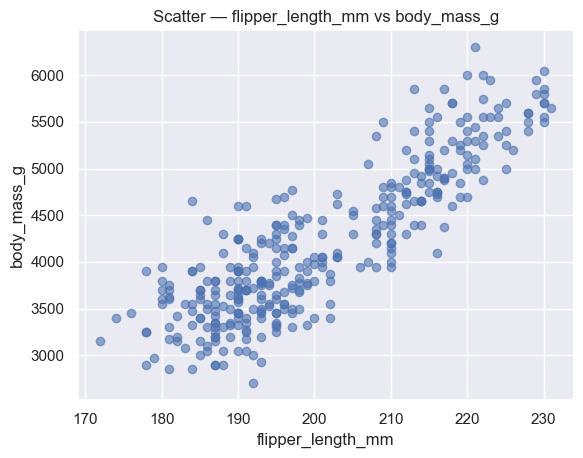

In [12]:
from itertools import combinations

pairs = list(combinations(num_cols, 2))

# Limit to first N pairs to avoid too many figures
N = min(12, len(pairs))
for (x, y) in pairs[:N]:
    plt.figure()
    plt.scatter(df[x], df[y], alpha=0.6)
    plt.title(f"Scatter — {x} vs {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

# Optional seaborn pairplot (can be heavy)
# sns.pairplot(df[num_cols].dropna())
# plt.show()


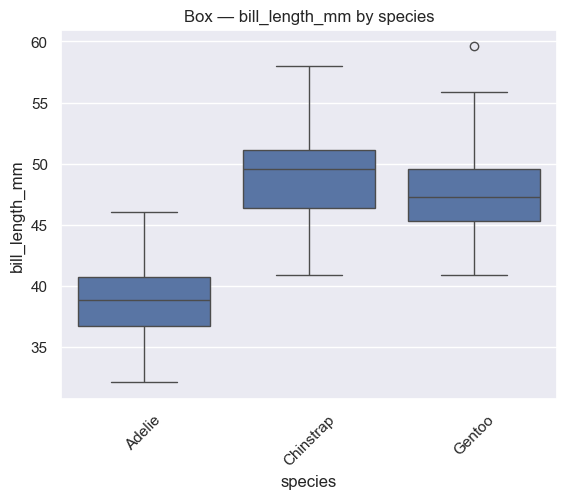

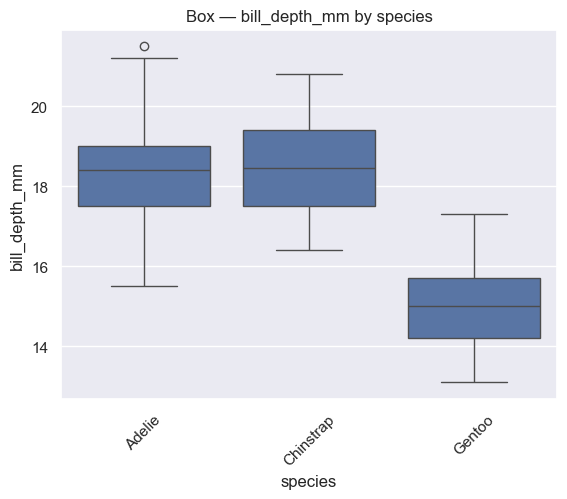

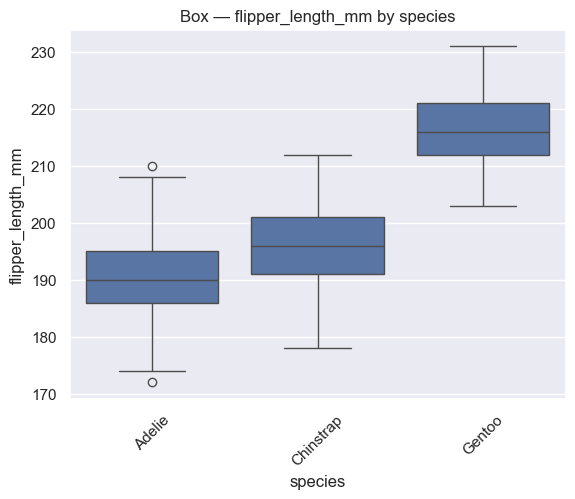

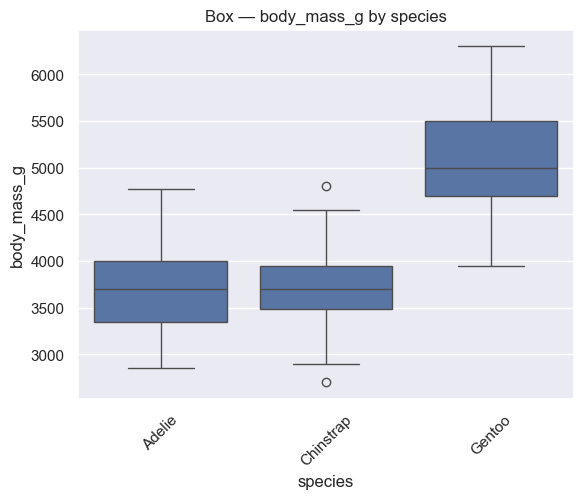

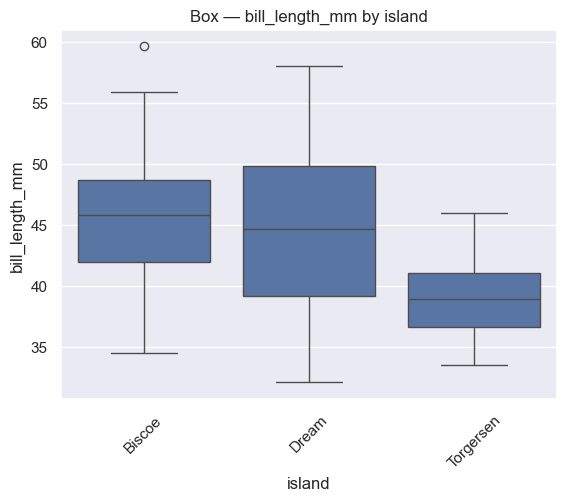

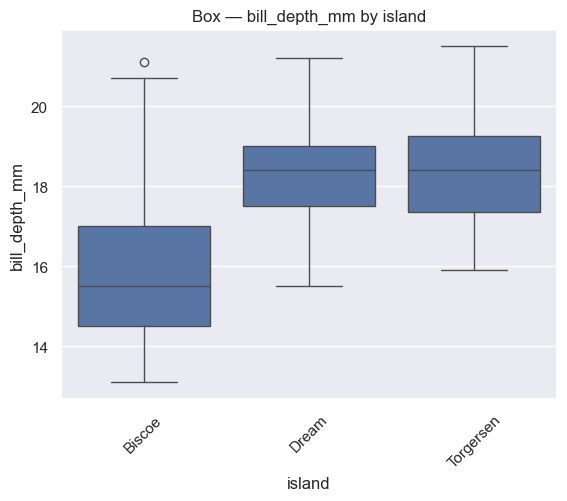

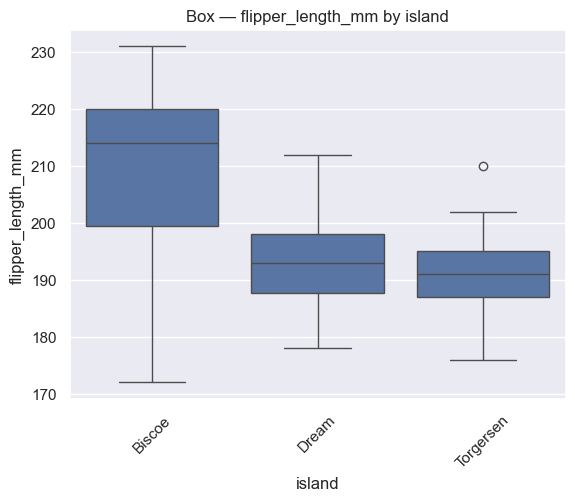

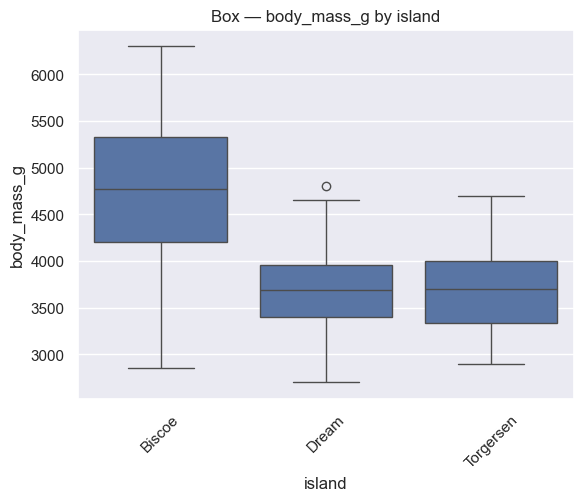

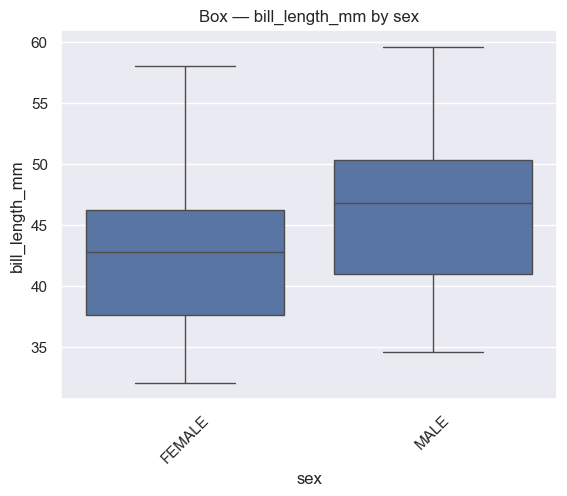

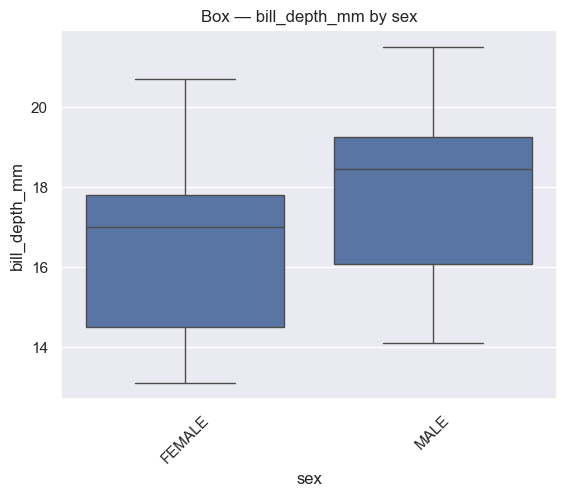

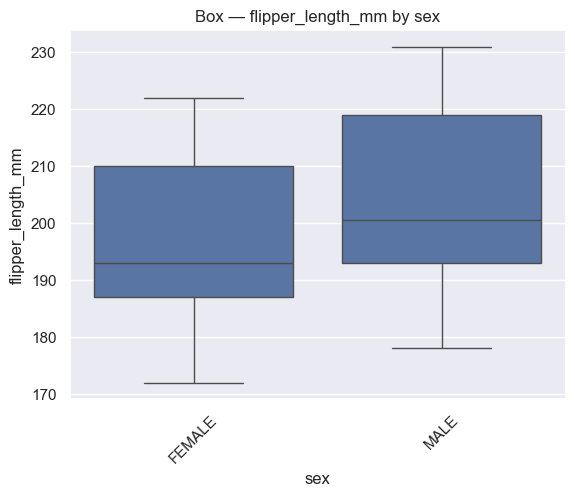

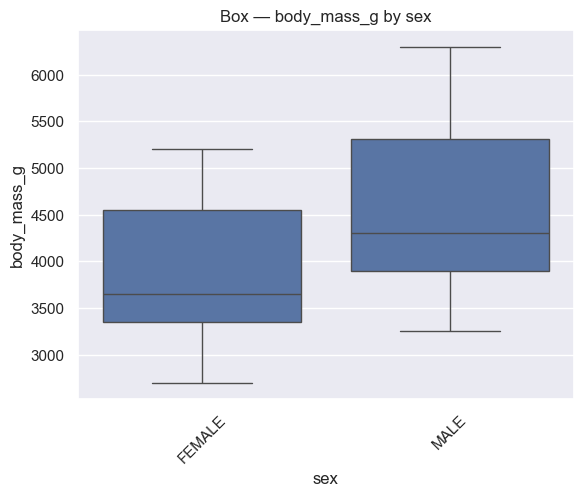

In [13]:
for cat in cat_cols:
    for num in num_cols:
        plt.figure()
        sns.boxplot(x=cat, y=num, data=df)
        plt.title(f"Box — {num} by {cat}")
        plt.xticks(rotation=45)
        plt.show()

        # optional violin
        # plt.figure()
        # sns.violinplot(x=cat, y=num, data=df, cut=0)
        # plt.title(f"Violin — {num} by {cat}")
        # plt.xticks(rotation=45)
        # plt.show()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


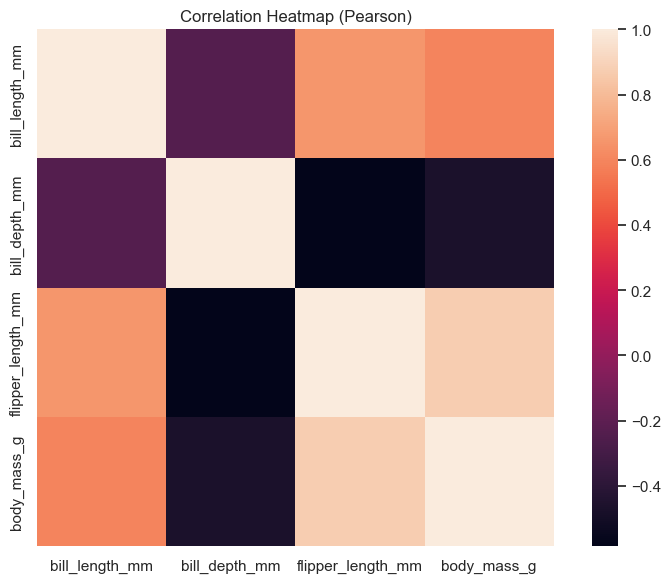

In [14]:
corr = df.select_dtypes(include=[np.number]).corr(numeric_only=True, method='pearson')
display(corr)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=False, square=True)
plt.title("Correlation Heatmap (Pearson)")
plt.tight_layout()
plt.show()



In [15]:
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(cat_cols) > 0 and len(num_cols) > 0:
    for cat in cat_cols:
        agg = df.groupby(cat)[num_cols].agg(['mean','median','min','max','std','count'])
        print(f"\nGrouped by {cat}:")
        display(agg.head())
else:
    print("No categorical or numeric columns available for groupby demo.")



Grouped by species:


C:\Users\User\AppData\Local\Temp\ipykernel_22096\647001397.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = df.groupby(cat)[num_cols].agg(['mean','median','min','max','std','count'])


bill_length_mm                                    bill_depth_mm  \
                    mean median   min   max       std count          mean   
species                                                                     
Adelie         38.791391  38.80  32.1  46.0  2.663405   151     18.346358   
Chinstrap      48.833824  49.55  40.9  58.0  3.339256    68     18.420588   
Gentoo         47.504878  47.30  40.9  59.6  3.081857   123     14.982114   

                                             flipper_length_mm                \
          median   min   max       std count              mean median    min   
species                                                                        
Adelie     18.40  15.5  21.5  1.216650   151        189.953642  190.0  172.0   
Chinstrap  18.45  16.4  20.8  1.135395    68        195.823529  196.0  178.0   
Gentoo     15.00  13.1  17.3  0.981220   123        217.186992  216.0  203.0   

                                  body_mass_g                          \
             max       std count         mean  median     min     max   
species                                                                 
Adelie     210.0  6.539457   151  3700.662252  3700.0  2850.0  4775.0   
Chinstrap  212.0  7.131894    68  3733.088235  3700.0  2700.0  4800.0   
Gentoo     231.0  6.484976   123  5076.016260  5000.0  3950.0  6300.0   

                             
                  std count  
species                      
Adelie     458.566126   151  
Chinstrap  384.335081    68  
Gentoo     504.116237   123


Grouped by island:


C:\Users\User\AppData\Local\Temp\ipykernel_22096\647001397.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = df.groupby(cat)[num_cols].agg(['mean','median','min','max','std','count'])


bill_length_mm                                    bill_depth_mm  \
                    mean median   min   max       std count          mean   
island                                                                      
Biscoe         45.257485  45.80  34.5  59.6  4.772731   167     15.874850   
Dream          44.167742  44.65  32.1  58.0  5.953527   124     18.344355   
Torgersen      38.950980  38.90  33.5  46.0  3.025318    51     18.429412   

                                             flipper_length_mm                \
          median   min   max       std count              mean median    min   
island                                                                         
Biscoe      15.5  13.1  21.1  1.820721   167        209.706587  214.0  172.0   
Dream       18.4  15.5  21.2  1.133116   124        193.072581  193.0  178.0   
Torgersen   18.4  15.9  21.5  1.339447    51        191.196078  191.0  176.0   

                                   body_mass_g                          \
             max        std count         mean  median     min     max   
island                                                                   
Biscoe     231.0  14.142268   167  4716.017964  4775.0  2850.0  6300.0   
Dream      212.0   7.507366   124  3712.903226  3687.5  2700.0  4800.0   
Torgersen  210.0   6.232238    51  3706.372549  3700.0  2900.0  4700.0   

                             
                  std count  
island                       
Biscoe     782.855743   167  
Dream      416.644112   124  
Torgersen  445.107940    51


Grouped by sex:


C:\Users\User\AppData\Local\Temp\ipykernel_22096\647001397.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = df.groupby(cat)[num_cols].agg(['mean','median','min','max','std','count'])


bill_length_mm                                    bill_depth_mm         \
                 mean median   min   max       std count          mean median   
sex                                                                             
FEMALE      42.096970   42.8  32.1  58.0  4.903476   165     16.425455  17.00   
MALE        45.854762   46.8  34.6  59.6  5.366896   168     17.891071  18.45   

                                   flipper_length_mm                       \
         min   max       std count              mean median    min    max   
sex                                                                         
FEMALE  13.1  20.7  1.795681   165        197.363636  193.0  172.0  222.0   
MALE    14.1  21.5  1.863351   168        204.505952  200.5  178.0  231.0   

                         body_mass_g                                            
              std count         mean  median     min     max         std count  
sex                                                                             
FEMALE  12.500776   165  3862.272727  3650.0  2700.0  5200.0  666.172050   165  
MALE    14.547876   168  4545.684524  4300.0  3250.0  6300.0  787.628884   168

In [16]:
df_clean = df.copy()

# Drop exact duplicates
df_clean = df_clean.drop_duplicates()

# Numeric imputation (median)
for col in df_clean.select_dtypes(include=[np.number]).columns:
    if df_clean[col].isna().any():
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Categorical imputation (mode)
for col in df_clean.select_dtypes(include=['object','category']).columns:
    if df_clean[col].isna().any():
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode().iloc[0])

print("Original shape:", df.shape, "-> Cleaned shape:", df_clean.shape)
df_clean.head()


Original shape: (344, 7) -> Cleaned shape: (344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,MALE
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,FEMALE


In [17]:
cat_cols_clean = df_clean.select_dtypes(include=['object','category']).columns.tolist()
df_encoded = pd.get_dummies(df_clean, columns=cat_cols_clean, drop_first=True)

print("Encoded shape:", df_encoded.shape)
df_encoded.head()



Encoded shape: (344, 9)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_MALE
0,39.10,18.7,181.0,3750.0,False,False,False,True,True
1,39.50,17.4,186.0,3800.0,False,False,False,True,False
2,40.30,18.0,195.0,3250.0,False,False,False,True,False
3,44.45,17.3,197.0,4050.0,False,False,False,True,True
4,36.70,19.3,193.0,3450.0,False,False,False,True,False


In [18]:
clean_path = "cleaned_data.csv"
encoded_path = "cleaned_encoded_data.csv"

df_clean.to_csv(clean_path, index=False)
df_encoded.to_csv(encoded_path, index=False)

print("Saved:", clean_path, "and", encoded_path)



Saved: cleaned_data.csv and cleaned_encoded_data.csv


In [48]:
%pip install sweetviz



   ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/15.1 MB 5.7 MB/s eta 0:00:03
   ---- ----------------------------------- 1.6/15.1 MB 6.3 MB/s eta 0:00:03
   ---------- ----------------------------- 3.9/15.1 MB 8.1 MB/s eta 0:00:02
   --------------- ------------------------ 6.0/15.1 MB 8.9 MB/s eta 0:00:02
   ---------------------- ----------------- 8.4/15.1 MB 9.2 MB/s eta 0:00:01
   ---------------------------- ----------- 10.7/15.1 MB 9.7 MB/s eta 0:00:01
   --------------------------------- ------ 12.6/15.1 MB 9.4 MB/s eta 0:00:01
   -------------------------------------- - 14.4/15.1 MB 9.4 MB/s eta 0:00:01
   ---------------------------------------- 15.1/15.1 MB 8.9 MB/s  0:00:01

   ---------------------------------------- 0/2 [importlib-resources]
   -------------------- ------------------- 1/2 [sweetviz]
   -------------------- ------------------- 1/2 [sweetviz]
   ---------------------------------------- 2/

                                             |          | [  0%]   00:00 -> (? left)

Sweetviz report generation failed: module 'numpy' has no attribute 'VisibleDeprecationWarning'


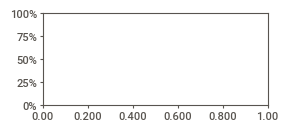

In [49]:
import pandas as pd
import sweetviz as sv

report = None
try:
    # Generate Sweetviz analysis report
    report = sv.analyze(df)
except Exception as e:
    print("Sweetviz report generation failed:", str(e))
    report = None

if report is not None:
    report_path = "eda_profile_report.html"
    report.show_html(report_path)
    print("Saved Sweetviz profiling report to:", report_path)
